# House Price Prediction
## Objective - To determine variables affecting the house prices
### Steps followed briefly are:
#### a. Data understanding, cleaning and preparing
#### b. Model Building
#### observations

In [66]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
# reading the dataset
house_data = pd.read_csv("train.csv", encoding = 'utf-8')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
#Check all columns 
house_data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [69]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [70]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [73]:
#checking duplicates
sum(house_data.duplicated(subset = 'Id')) == 0

True

In [74]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea  

In [75]:
#Checking for outlier in the numerical columns
house_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [76]:
# Removing Outlier method

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [77]:
#Checking the shape of the dataframe
house_data.shape

(1460, 81)

In [78]:
# categorical -> none
meaningful_nulls = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in meaningful_nulls:
    house_data[i].fillna("none", inplace=True)

In [79]:
# Check nulls once again

house_data.columns[house_data.isnull().any()] 

null_2 = house_data.isnull().sum()/len(house_data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [80]:
# check colums 1-1
house_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [81]:
house_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [82]:
house_data['MasVnrArea'].describe()


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [83]:
house_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [84]:
# Imputing lotfrontage with neighbourhood values

house_data['LotFrontage'] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_data["GarageYrBlt"].fillna(house_data["GarageYrBlt"].median(), inplace=True)
house_data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
house_data["Electrical"].dropna(inplace=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

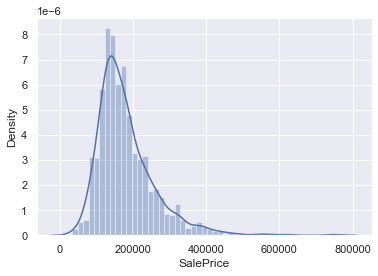

In [85]:
# EDA

#numeric
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
# Dropping ID Column
house_data_numeric = house_data_numeric.drop(['Id'], axis=1)

# SalePriceDistribution
sns.distplot(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

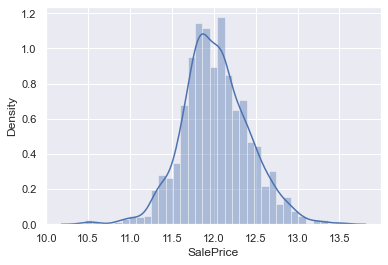

In [86]:
# sale price is left skewed, hence log transformation
house_data['SalePrice']=np.log1p(house_data['SalePrice'])
sns.distplot(house_data['SalePrice'])

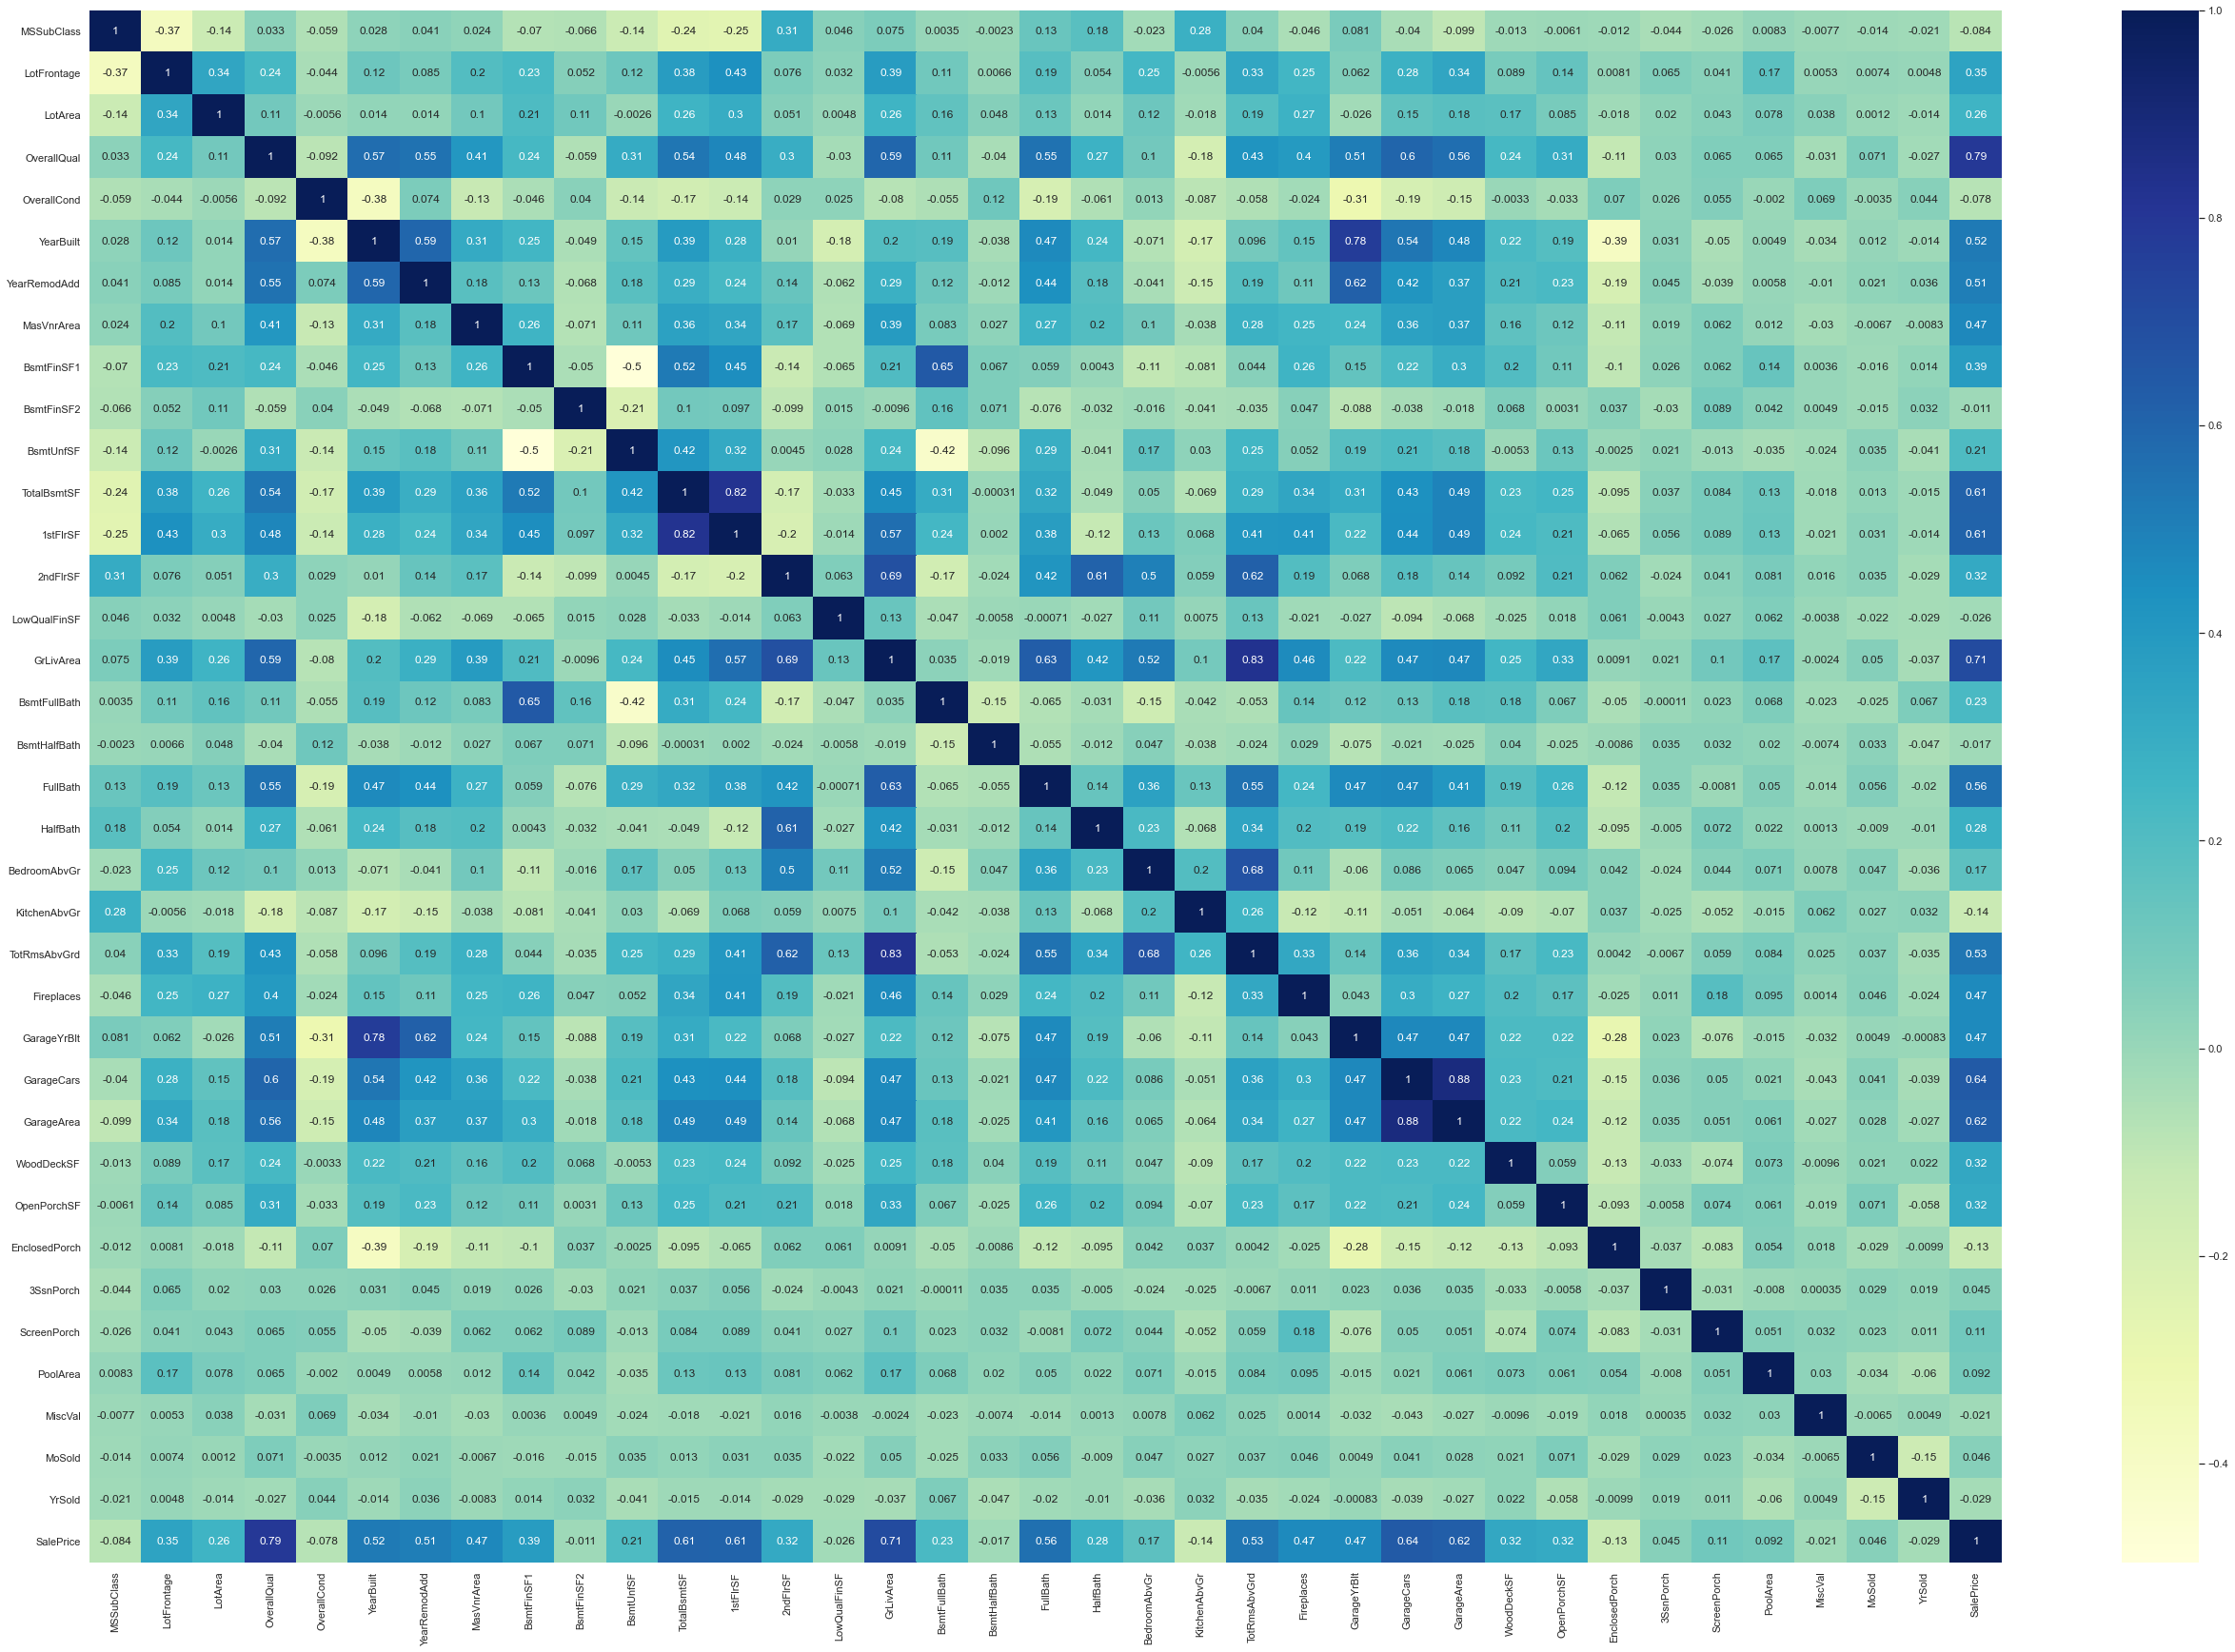

In [87]:
# correlation
corr_matrix = house_data_numeric.corr()
# plotting
plt.figure(figsize=(45,30))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

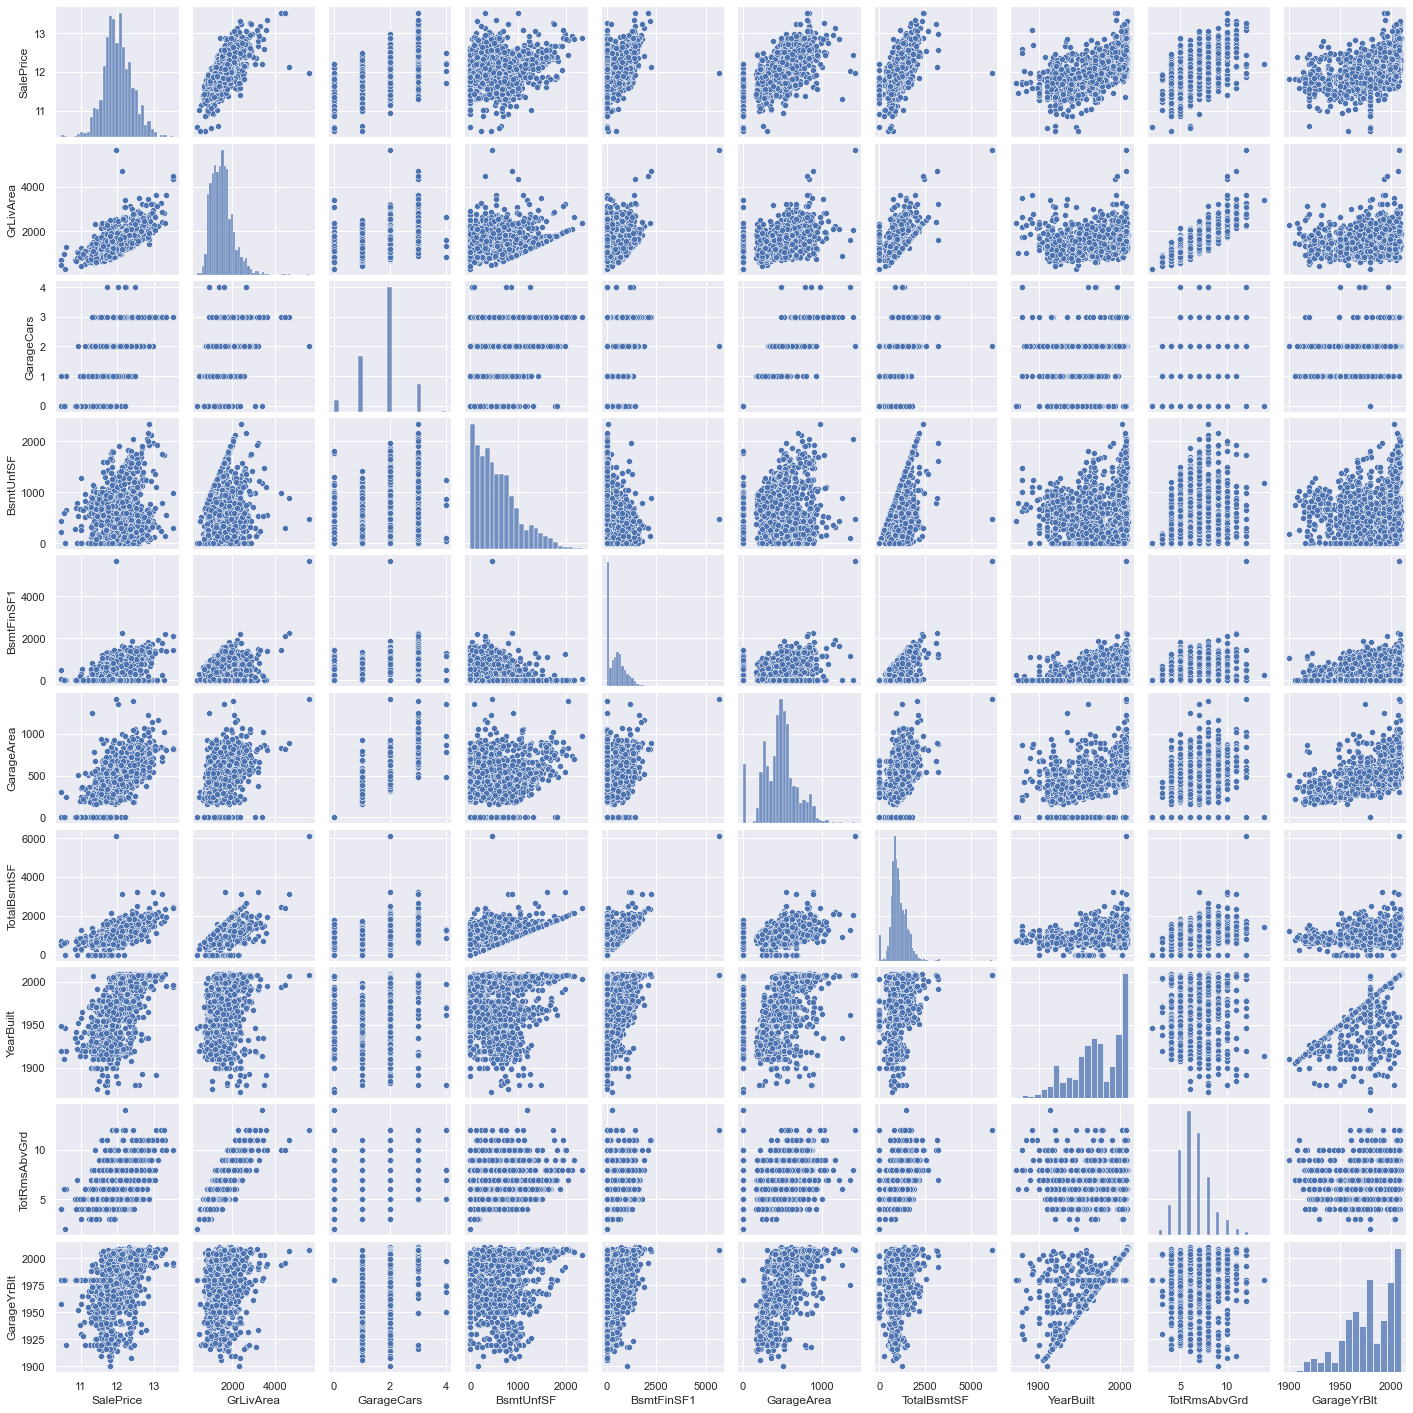

In [88]:
# pairplot
sns.set()
columns = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house_data[columns], size = 2)
plt.show()

In [89]:
# dropping columns based on pair plt

house_data = house_data.drop(['GarageCars'], axis = 1)
house_data = house_data.drop(['BsmtUnfSF'], axis = 1)
house_data = house_data.drop(['TotRmsAbvGrd'], axis = 1)
house_data = house_data.drop(['GarageYrBlt'], axis = 1)    

house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220


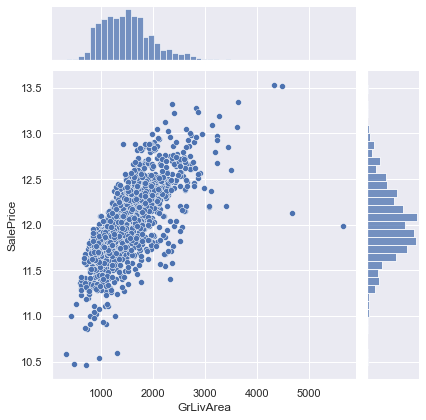

In [90]:
# Analysing important colums as seen by pair plot
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_data)
plt.show()

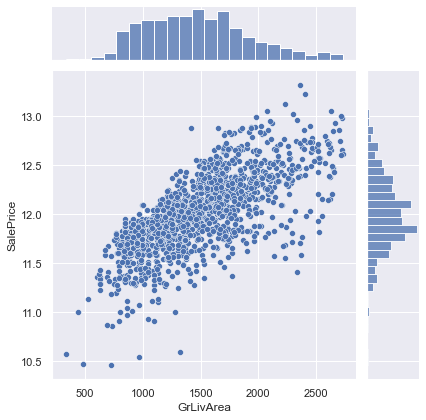

In [91]:
# Removing outliers
house_data = remove_outliers(house_data,'GrLivArea')
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_data)
plt.show()

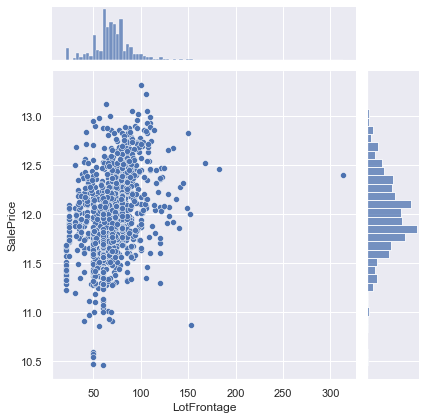

In [92]:
# Lot frontage 
sns.jointplot(x = house_data['LotFrontage'], y = house_data['SalePrice'])
plt.show()

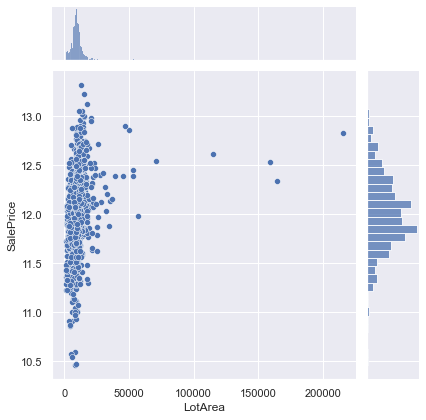

In [93]:
# LotArea
sns.jointplot(x = house_data['LotArea'], y = house_data['SalePrice'])
plt.show()

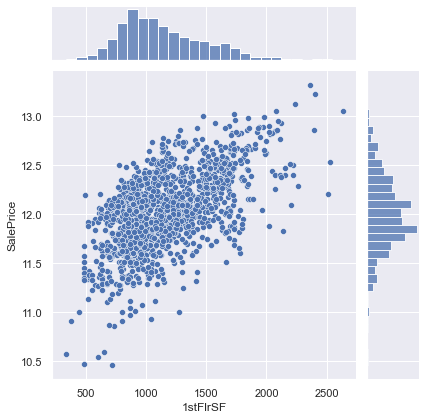

In [94]:
# 1stFlrSF
sns.jointplot(x = house_data['1stFlrSF'], y = house_data['SalePrice'])
plt.show()

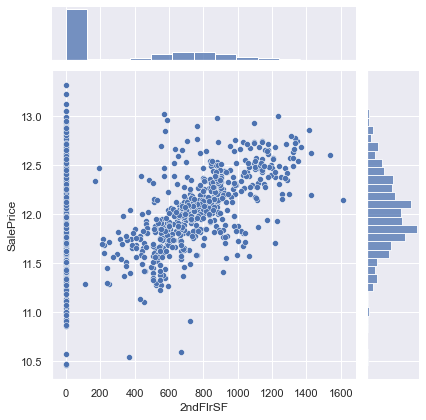

In [95]:
# 2ndFlrSF
sns.jointplot(x = house_data['2ndFlrSF'], y = house_data['SalePrice'])
plt.show()

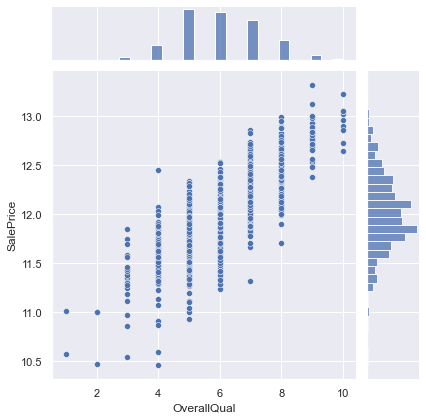

In [96]:
# OverallQual
# house_data.head()
sns.jointplot(x = house_data['OverallQual'], y = house_data['SalePrice'])
plt.show()

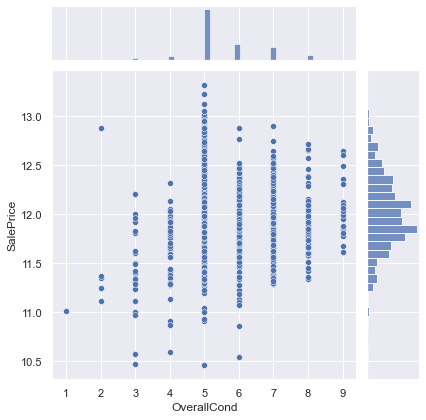

In [97]:
# OverallCond
sns.jointplot(x=house_data['OverallCond'], y = house_data['SalePrice'])
plt.show()

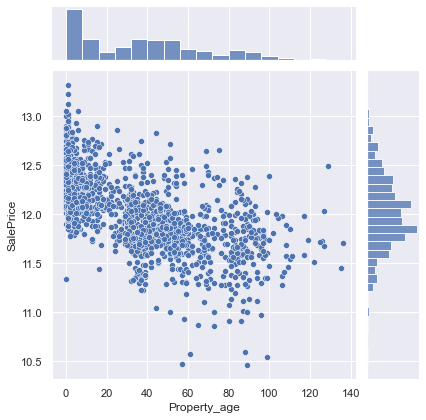

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Property_age
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,12.429220,8


In [101]:
# Property_age =   YrSold - YearBuilt
house_data['Property_age'] = (house_data['YrSold'] - house_data['YearBuilt'])
sns.jointplot(x = house_data['Property_age'], y = house_data['SalePrice'])
plt.show()

house_data = house_data.drop(['MoSold'], axis = 1)
house_data = house_data.drop(['YrSold'], axis = 1)
house_data = house_data.drop(['YearBuilt'], axis = 1)
house_data = house_data.drop(['YearRemodAdd'], axis = 1)
house_data.head()

In [102]:
# check to see if columns can be dropped based on value, counts, repetitions and variance
variance_check= house_data.select_dtypes(include=['float64', 'int64'])
for i in variance_check:
    print(house_data[i].value_counts())

1460    1
498     1
477     1
478     1
479     1
       ..
972     1
973     1
974     1
975     1
1       1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
144.0      1
39.0       1
106.0      1
38.0       1
88.5       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
5350      1
9986      1
9452      1
12180     1
7150      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
180.0      8
108.0      8
72.0       

In [103]:
# droppping columns
house_data = house_data.drop(['Street','Utilities','PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [104]:
house_data.shape

(1429, 63)

# Data Preparaion

In [105]:
# Drop 'Id'

house_data = house_data.drop(['Id'], axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,Property_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,8


In [106]:
#data types: int, float, object
types = house_data.dtypes
#numerical
numeric = types[(types == 'int64') | (types == float)] 
#categorical
categorical = types[types == object]

In [107]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [108]:
#convert numeric_type to a list
numerical_columns = list(numeric.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'Property_age']


In [109]:
#Categorical columns
categorical_columns = list(categorical.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [111]:
# Categorical columns conversions and defining X and Y
house_data = pd.get_dummies(house_data, drop_first=True )
X = house_data.drop(['SalePrice'], axis=1)
y = house_data['SalePrice']
X.head()
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [114]:
# Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_age']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_age']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_age']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_age']])
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,2.754667,-0.727119,1.478865,-0.222797,2.231812,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,1.131973,-0.250936,-0.990631,-0.727119,0.212713,-0.222797,-0.918240,-0.857140,-0.758474,-0.368801,-0.378185,-0.115383,3.351363,-0.054574,0.445587,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,-0.918240,0.077613,0.257158,-0.718144,2.265177,-0.115383,-0.268919,-0.054574,-0.447904,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.324542,0.462250,-0.086269,-0.764271,1.258264,0.774624,-0.106571,-0.300737,-0.764234,-0.722635,1.060654,-0.111211,0.401627,-0.816345,-0.250936,-0.990631,1.275964,0.212713,-0.222797,2.231812,-0.734395,0.663411,-0.718144,-0.378185,-0.115383,-0.268919,-0.054574,0.908879,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
993,0.085645,-0.058435,-0.148775,-0.012775,-0.513939,-0.564274,-1.008820,-0.300737,-0.709617,-1.115022,1.046127,-0.111211,0.079368,-0.816345,-0.250936,0.882018,1.275964,0.212713,-0.222797,-0.918240,0.455291,-0.758474,-0.106794,-0.378185,-0.115383,-0.268919,-0.054574,-1.209026,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


# Model - Lasso and Ridge

In [115]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061986,0.010038,0.003617,0.003407,0.0001,{'alpha': 0.0001},-0.089702,-0.078848,-0.088372,-0.085734,-0.077120,-0.083955,0.005070,2,-0.065801,-0.068092,-0.065346,-0.066311,-0.067607,-0.066631,0.001052
1,0.012907,0.003742,0.001608,0.003216,0.001,{'alpha': 0.001},-0.082755,-0.083177,-0.087933,-0.082553,-0.079647,-0.083213,0.002670,1,-0.075478,-0.077009,-0.074278,-0.076496,-0.076136,-0.075880,0.000943
2,0.008469,0.003218,0.000000,0.000000,0.01,{'alpha': 0.01},-0.090790,-0.093399,-0.097715,-0.092036,-0.088628,-0.092514,0.003038,3,-0.091236,-0.090420,-0.089019,-0.090524,-0.091156,-0.090471,0.000796
3,0.009670,0.000804,0.000402,0.000805,0.05,{'alpha': 0.05},-0.129246,-0.113828,-0.132264,-0.112722,-0.113127,-0.120237,0.008648,4,-0.119298,-0.118718,-0.117623,-0.118882,-0.119586,-0.118822,0.000673
4,0.007650,0.002951,0.003235,0.003499,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,-0.146182,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


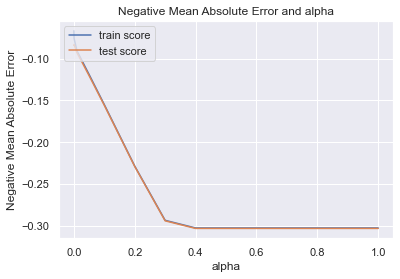

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
# Alpha stablises at 0.4

In [178]:
# To balance trade off between bias and variance, we will start with lowest alpha and proceed
# while keeping an eye on R2 and RMSE on each iteration

In [209]:
# Iteration 1; alpha = 0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
#list(zip(cls, model_params))
# lasso regression
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Lasso
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors)
predictors.shape

0.9373643255877878
0.9106115633460465
RMSE : 0.11306834653714465
                  Variable  Coefficient
0                 constant       11.578
1               MSSubClass       -0.015
2              LotFrontage        0.009
3                  LotArea        0.024
4              OverallQual        0.063
..                     ...          ...
200         SaleType_ConLD        0.079
205            SaleType_WD       -0.011
206  SaleCondition_AdjLand        0.072
209   SaleCondition_Normal        0.070
210  SaleCondition_Partial        0.113

[154 rows x 2 columns]


(154, 2)

In [188]:
# Good R2 and RMSE however very complicated model

In [210]:
# Iteration 2; alpha = 0.001
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
#list(zip(cls, model_params))
# lasso regression
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Lasso
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors)
predictors.shape

0.9206709153542387
0.9067784241823189
RMSE : 0.11546718823765781
                  Variable  Coefficient
0                 constant       11.828
1               MSSubClass       -0.010
2              LotFrontage        0.012
3                  LotArea        0.019
4              OverallQual        0.084
5              OverallCond        0.057
6               MasVnrArea        0.001
7               BsmtFinSF1        0.036
8               BsmtFinSF2        0.005
9              TotalBsmtSF        0.038
12            LowQualFinSF       -0.002
13               GrLivArea        0.127
14            BsmtFullBath        0.013
16                FullBath        0.006
17                HalfBath        0.008
18            BedroomAbvGr       -0.003
19            KitchenAbvGr       -0.008
20              Fireplaces        0.010
21              GarageArea        0.028
22              WoodDeckSF        0.013
24           EnclosedPorch        0.009
25               3SsnPorch        0.005
26             

(69, 2)

In [ ]:
# Not much change - lets try to increase it further

In [211]:
# Iteration 3; alpha = 0.01
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
#list(zip(cls, model_params))
# lasso regression
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Lasso
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors)
predictors.shape

0.8854624158407248
0.8894603158029368
RMSE : 0.12573595366706636
           Variable  Coefficient
0          constant       12.003
1        MSSubClass       -0.007
2       LotFrontage        0.014
3           LotArea        0.015
4       OverallQual        0.112
5       OverallCond        0.050
7        BsmtFinSF1        0.035
9       TotalBsmtSF        0.042
13        GrLivArea        0.125
14     BsmtFullBath        0.010
19     KitchenAbvGr       -0.008
20       Fireplaces        0.024
21       GarageArea        0.034
22       WoodDeckSF        0.010
26      ScreenPorch        0.005
28     Property_age       -0.095
173  KitchenQual_TA       -0.007


(17, 2)

In [212]:
# It could be considerable alpha, but lets try the next value

In [213]:
# Iteration 4; alpha = 0.05
alpha = 0.05
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
#list(zip(cls, model_params))
# lasso regression
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Lasso
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors)
predictors.shape

0.810576713549257
0.8291485394300617
RMSE : 0.15631826218847628
        Variable  Coefficient
0       constant       11.999
4    OverallQual        0.134
7     BsmtFinSF1        0.024
9    TotalBsmtSF        0.037
13     GrLivArea        0.100
20    Fireplaces        0.011
21    GarageArea        0.028
28  Property_age       -0.047


(8, 2)

In [ ]:
# R2 reduced and RMSE increase, so we will choose alpha = 0.01, which is iteration # 3

In [257]:
# Iteration 3; alpha = 0.01
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
#list(zip(cls, model_params))
# lasso regression
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Lasso
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors = pd.DataFrame(params[(params['Coefficient'] != 0)])
predictors_lasso = predictors
predictors_lasso = predictors_lasso.sort_values((['Coefficient']), axis = 0, ascending = False)
print(predictors_lasso)

predictors_lasso.shape

0.8854624158407248
0.8894603158029368
RMSE : 0.12573595366706636
           Variable  Coefficient
0          constant       12.003
13        GrLivArea        0.125
4       OverallQual        0.112
5       OverallCond        0.050
9       TotalBsmtSF        0.042
7        BsmtFinSF1        0.035
21       GarageArea        0.034
20       Fireplaces        0.024
3           LotArea        0.015
2       LotFrontage        0.014
14     BsmtFullBath        0.010
22       WoodDeckSF        0.010
26      ScreenPorch        0.005
1        MSSubClass       -0.007
173  KitchenQual_TA       -0.007
19     KitchenAbvGr       -0.008
28     Property_age       -0.095


(17, 2)

In [220]:
# Applying Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [221]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012892,0.007351,0.003592,0.000491,0.0001,{'alpha': 0.0001},-0.098827,-0.080586,-0.093923,-0.093385,-0.081908,-0.089726,0.007190,26,-0.063890,-0.066811,-0.062901,-0.064702,-0.065821,-0.064825,0.001380
1,0.003926,0.006052,0.003124,0.006249,0.001,{'alpha': 0.001},-0.098810,-0.080580,-0.093891,-0.093357,-0.081877,-0.089703,0.007188,25,-0.063891,-0.066811,-0.062903,-0.064704,-0.065823,-0.064826,0.001380
2,0.005568,0.006906,0.003931,0.006055,0.01,{'alpha': 0.01},-0.098639,-0.080523,-0.093591,-0.093089,-0.081615,-0.089491,0.007154,24,-0.063904,-0.066811,-0.062931,-0.064715,-0.065846,-0.064842,0.001374
3,0.009472,0.006514,0.002162,0.001819,0.05,{'alpha': 0.05},-0.097945,-0.080315,-0.092583,-0.092083,-0.081129,-0.088811,0.006922,23,-0.063979,-0.066830,-0.063098,-0.064761,-0.065935,-0.064921,0.001335
4,0.012422,0.007061,0.000000,0.000000,0.1,{'alpha': 0.1},-0.097200,-0.080133,-0.091735,-0.091160,-0.080831,-0.088212,0.006658,22,-0.064088,-0.066874,-0.063300,-0.064818,-0.066043,-0.065025,0.001292


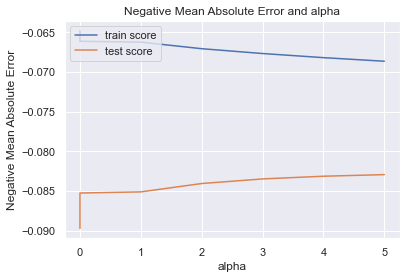

In [222]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [223]:
# since error stablises after alpha = 2, and since we need to reduce complexity (bias-variance trade-off)
# so we will choose alpha = 2
# to make verify the understanding we will also choose alpha = 1 and alpha = 3 to see the difference in results

In [224]:
# Iteration 1; alpha = 1
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# lasso model parameters
model_params = list(ridge.coef_ )
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
# Ridge regression
lm = Ridge(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Ridge
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors_ridge = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors_ridge)
predictors_ridge.shape

0.9379382207144427
0.9068442884415816
RMSE : 0.11542639025415673
                  Variable  Coefficient
0                 constant       11.696
1               MSSubClass       -0.017
2              LotFrontage        0.008
3                  LotArea        0.026
4              OverallQual        0.062
..                     ...          ...
206  SaleCondition_AdjLand        0.082
207   SaleCondition_Alloca       -0.005
208   SaleCondition_Family        0.015
209   SaleCondition_Normal        0.075
210  SaleCondition_Partial        0.118

[207 rows x 2 columns]


(207, 2)

In [225]:
# Iteration 2; alpha = 2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# lasso model parameters
model_params = list(ridge.coef_ )
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
# Ridge regression
lm = Ridge(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Ridge
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors_ridge = pd.DataFrame(params[(params['Coefficient'] != 0)])
print(predictors_ridge)
predictors_ridge.shape

0.9364594823911133
0.9077597079466583
RMSE : 0.11485785595060985
                  Variable  Coefficient
0                 constant       11.739
1               MSSubClass       -0.017
2              LotFrontage        0.009
3                  LotArea        0.025
4              OverallQual        0.065
..                     ...          ...
206  SaleCondition_AdjLand        0.061
207   SaleCondition_Alloca       -0.010
208   SaleCondition_Family        0.012
209   SaleCondition_Normal        0.074
210  SaleCondition_Partial        0.097

[204 rows x 2 columns]


(204, 2)

In [255]:
# Iteration 3; alpha = 3
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# lasso model parameters
model_params = list(ridge.coef_ )
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cls = X.columns
cls = cls.insert(0, "constant")
# Ridge regression
lm = Ridge(alpha=alpha)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
# Creating a dataframe for the coefficients obtained from Ridge
modl = list(zip(cls, model_params))
params = pd.DataFrame(modl)
params.columns = ['Variable', 'Coefficient']
# Chose variables whose coefficients are non-zero
predictors_ridge = pd.DataFrame(params[(params['Coefficient'] != 0)])
pd.set_option('display.max_rows', None)
predictors_ridge = predictors_ridge.sort_values((['Coefficient']), axis = 0, ascending = False)
print(predictors_ridge)
predictors_ridge.shape

0.9353386385406008
0.9082889363061555
RMSE : 0.1145278836886628
                  Variable  Coefficient
0                 constant       11.762
29             MSZoning_FV        0.118
50    Neighborhood_Crawfor        0.111
31             MSZoning_RL        0.102
66    Neighborhood_StoneBr        0.086
210  SaleCondition_Partial        0.086
30             MSZoning_RH        0.079
13               GrLivArea        0.076
209   SaleCondition_Normal        0.072
32             MSZoning_RM        0.071
4              OverallQual        0.066
70         Condition1_Norm        0.064
95     Exterior1st_BrkFace        0.064
136       Foundation_Stone        0.055
5              OverallCond        0.052
134       Foundation_PConc        0.050
200         SaleType_ConLD        0.050
166           CentralAir_Y        0.050
103     Exterior1st_Stucco        0.049
206  SaleCondition_AdjLand        0.049
146        BsmtExposure_Gd        0.047
11                2ndFlrSF        0.047
124       MasVnr

(205, 2)

In [227]:
# while r2 and RMSE are same in all the cases, but alpha = 2 gives the lease complexity, we choose alpha = 2

In [258]:
# Ridge is better in terms of r2 and RMSE than lasso
# however Ridge is having a very complex model compared to lasso
# hence for robustness and easy-interpretation, we will choose lasso with alpha = 0.01